In [13]:
import pandas as pd

# Load the dataset
file_path = 'Customers.csv'
df = pd.read_csv(file_path)

# Basic inspection
shape = df.shape
shape

(2000, 8)

In [15]:
missing_values = df.isnull().sum()
missing_values

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [17]:
duplicates = df.duplicated().sum()
duplicates

0

In [19]:
data_types = df.dtypes
data_types

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [21]:
summary_statistics = df.describe(include='all')
summary_statistics

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


In [7]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
df_numeric = df[numeric_columns]

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Create a DataFrame from the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns)

df_scaled.head()


,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,-1.054089,-2.093501,-0.428339,-0.791207,0.117497
1,-0.983723,-1.656133,1.075546,-0.281162,-0.390051
2,-1.018906,-0.540845,-1.609962,-0.791207,-1.405148
3,-0.913356,-1.131292,0.932319,-1.046230,-0.897599
4,-0.631891,-1.590528,-0.392532,-0.536185,1.132594


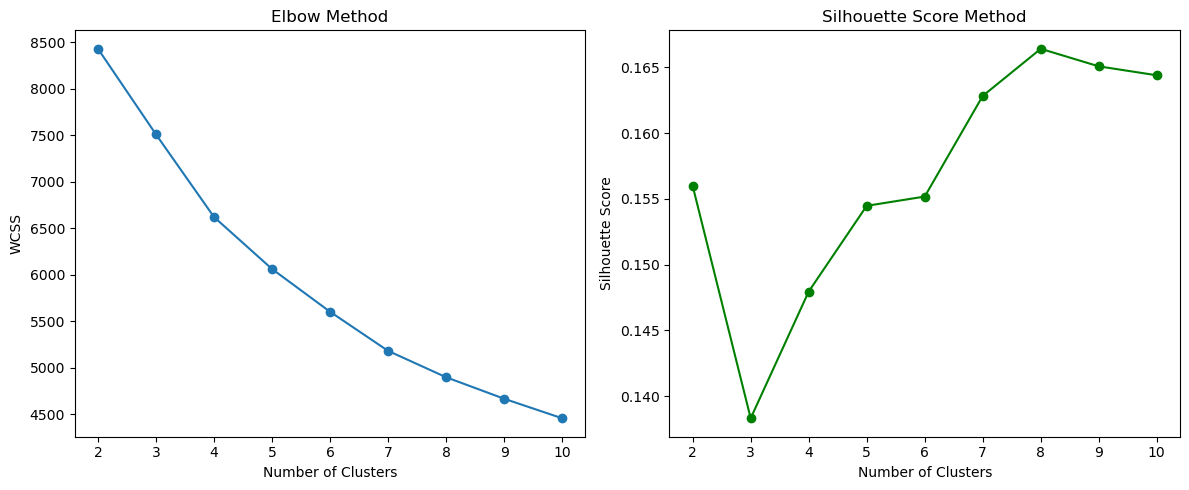

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters to test
cluster_range = range(2, 11)

# Store WCSS and Silhouette Scores
wcss = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [25]:
# Create a DataFrame to show silhouette scores for each k
silhouette_df = pd.DataFrame({
    'Number of Clusters (k)': list(cluster_range),
    'Silhouette Score': silhouette_scores
})

silhouette_df


,Number of Clusters (k),Silhouette Score
0,2,0.155990
1,3,0.138317
2,4,0.147955
3,5,0.154476
4,6,0.155180
5,7,0.162837
6,8,0.166419
7,9,0.165084
8,10,0.164404


In [29]:
from sklearn.cluster import KMeans

# Apply KMeans with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Preview the dataset with the new cluster labels
print(df[['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Cluster']].head())


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  Cluster
0           1    Male   19              15000                      39        2
1           2    Male   21              35000                      81        3
2           3  Female   20              86000                       6        2
3           4  Female   23              59000                      77        3
4           5  Female   31              38000                      40        0


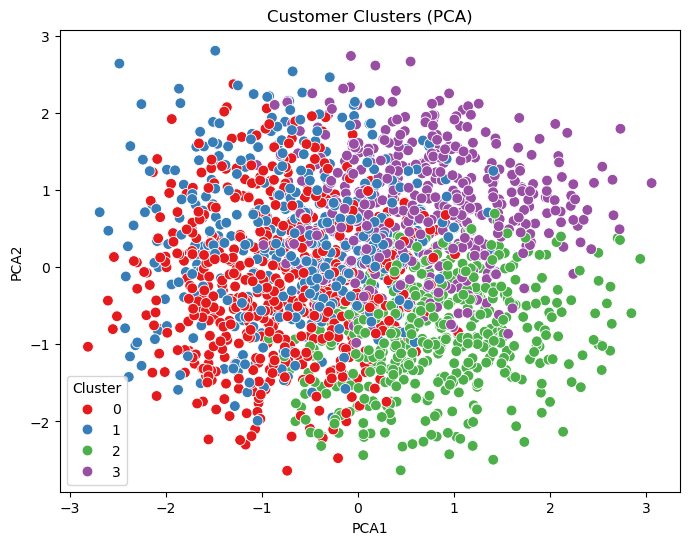

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame for PCA components
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60)
plt.title('Customer Clusters (PCA)')
plt.show()


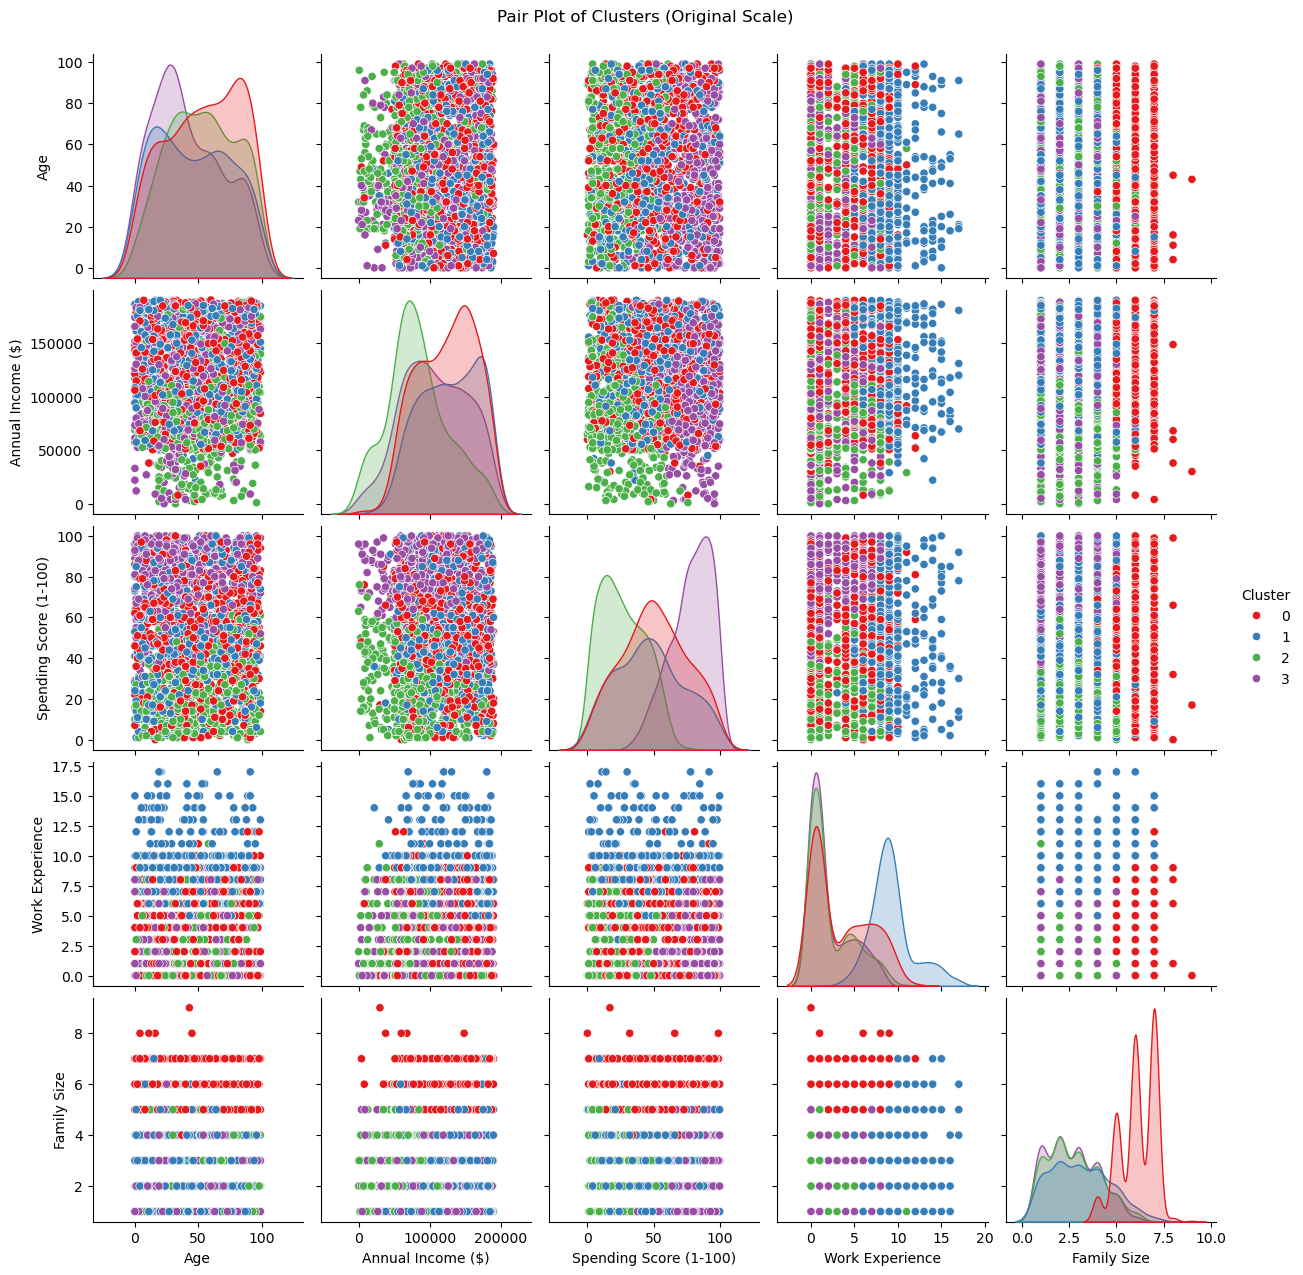

In [63]:
df_pairplot = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].copy()
df_pairplot['Cluster'] = df['Cluster']

sns.pairplot(df_pairplot, hue='Cluster', palette='Set1')
plt.suptitle("Pair Plot of Clusters (Original Scale)", y=1.02)
plt.show()


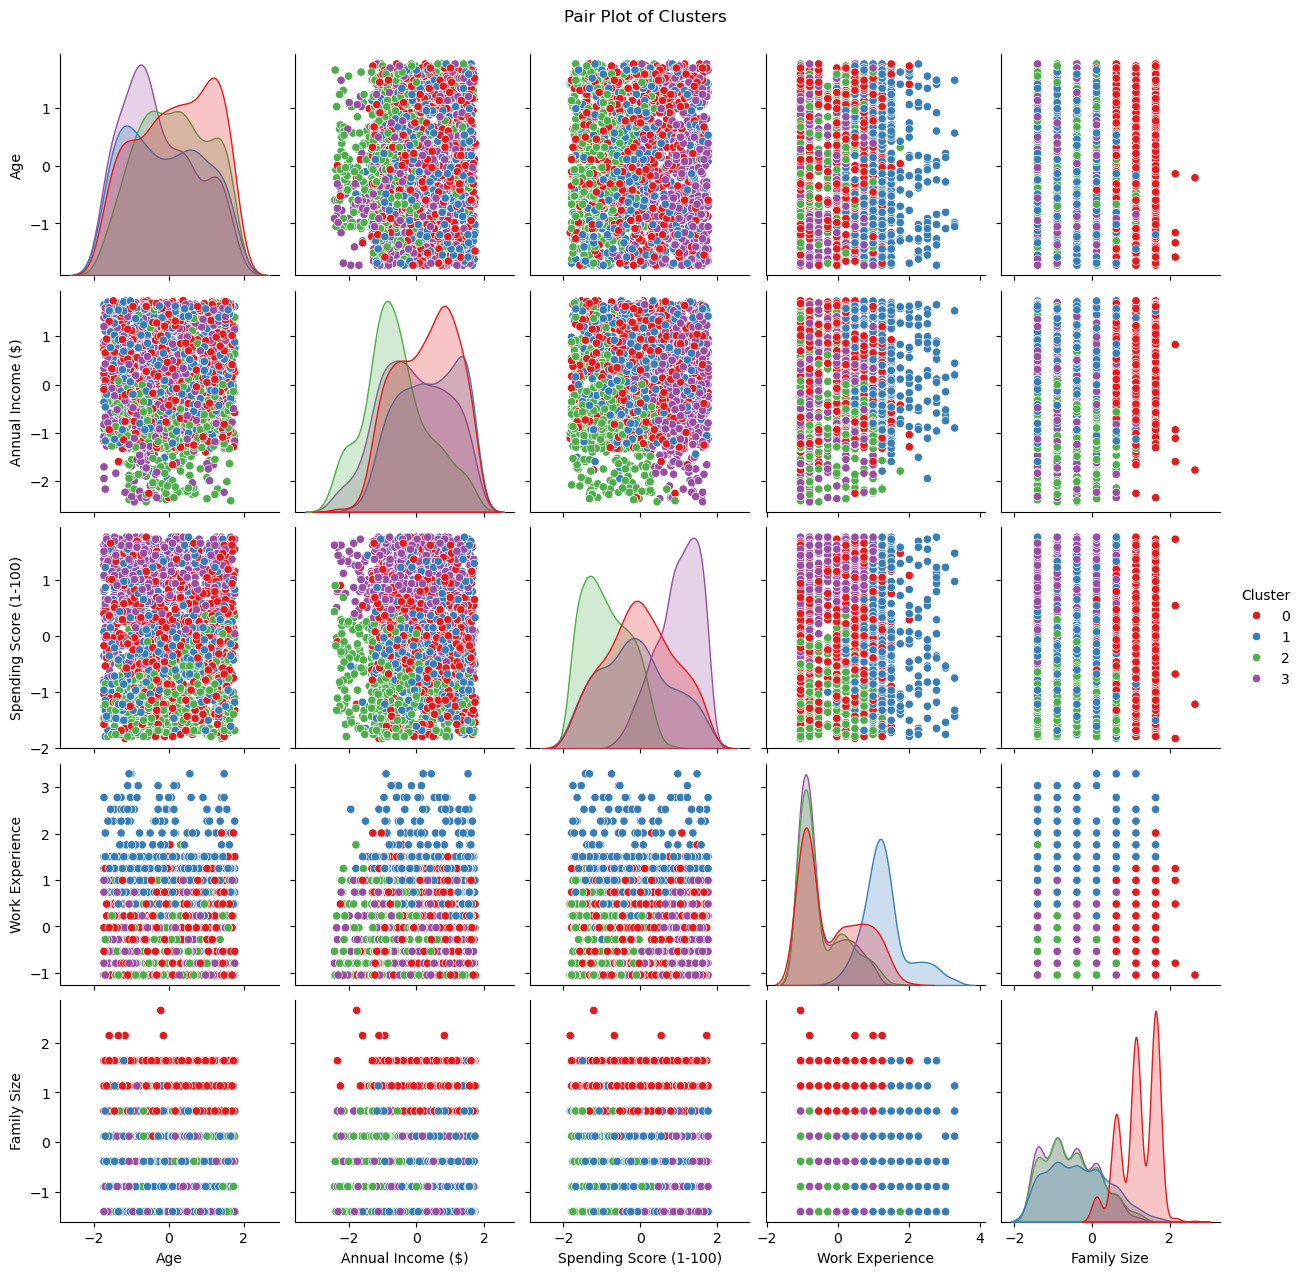

In [45]:
# Add cluster to the scaled DataFrame for pairplot
df_pairplot = df_scaled.copy()
df_pairplot['Cluster'] = df['Cluster']
# Pair Plot
sns.pairplot(df_pairplot, hue='Cluster', palette='Set1')
plt.suptitle("Pair Plot of Clusters", y=1.02)
plt.show()

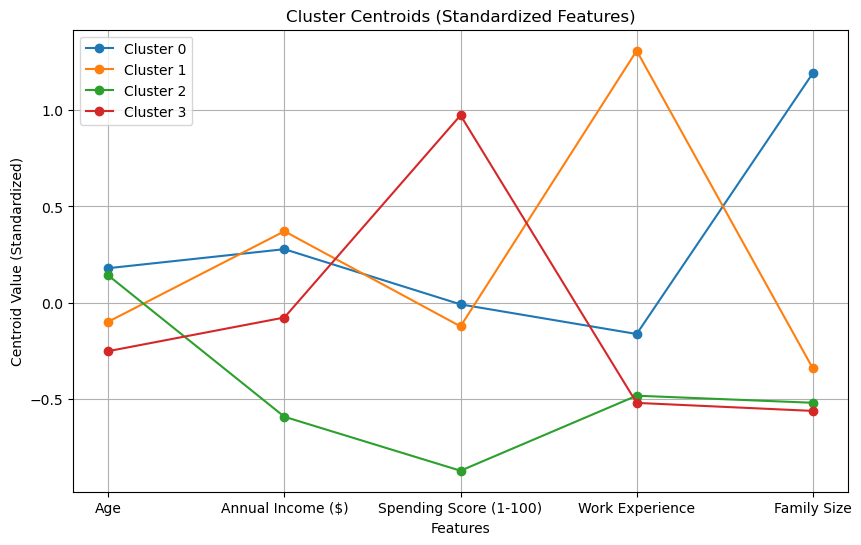

In [47]:
# Get the centroids from KMeans (on scaled data)
centroids = kmeans.cluster_centers_

# Plot centroids for each feature
features = df_scaled.columns
plt.figure(figsize=(10, 6))

for i in range(4):  # assuming 4 clusters
    plt.plot(features, centroids[i], marker='o', label=f'Cluster {i}')

plt.title('Cluster Centroids (Standardized Features)')
plt.xlabel('Features')
plt.ylabel('Centroid Value (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


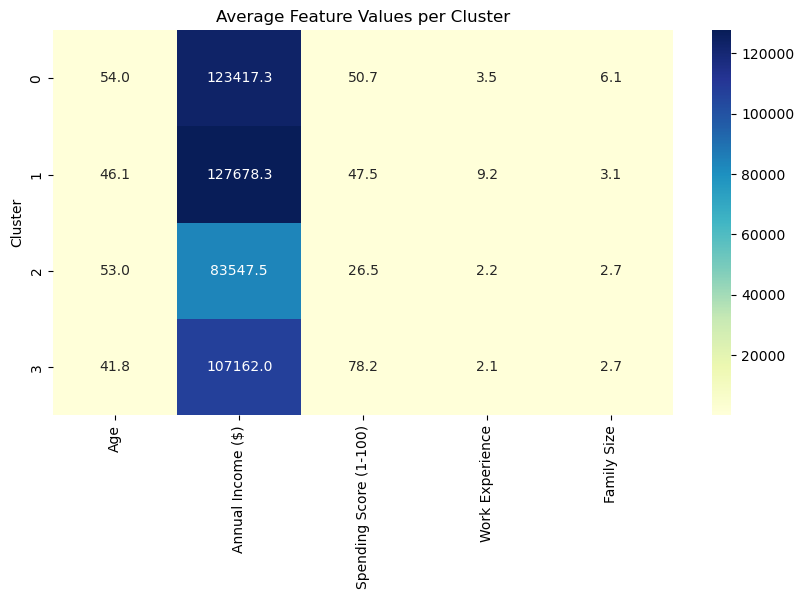

In [57]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 
                                         'Work Experience', 'Family Size']].mean()

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Feature Values per Cluster")
plt.show()
